In [ ]:
isf10 = IsolationForest(contamination=0.0011, max_features=1.0, random_state=0).fit(train.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
result10 = isf10.predict(val.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3']])

In [ ]:
f1_score(val_class, np.where(result10==1, 0, 1), average='macro')

0.7583744968510364

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [3]:
trainpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/train.csv'
testpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/test.csv'
valpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/val.csv'
submissionpath= '/content/gdrive/MyDrive/YBIGTA_CreditAI/open/sample_submission.csv'

train=pd.read_csv(trainpath)
test=pd.read_csv(testpath)
val=pd.read_csv(valpath)
submission=pd.read_csv(submissionpath)

In [4]:
train = train.drop(columns=['ID'])
val_class = val.Class
val = val.drop(columns=['ID', 'Class'])
test = test.drop(columns=['ID'])

In [68]:
train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [6]:
from sklearn.ensemble import IsolationForest

In [ ]:
'''
IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

n_estimators: 몇 개의 base estimators를 사용하여 앙상블 할 것인가
max_samples: 하나의 부분 tree에 몇 개의 data를 입력해 학습시킬 것인가. auto로 입력하면 min(256, n_samples), 숫자로 입력하면 그만큼
contamination: proportion of outliers in the data set, 'auto'는 논문의 기준을 따름, 0 초과 0.5 이하의 숫자를 입력하면 해당 비율
max_features: 각각의 tree에 사용할 feature 개수
bootstrap: True or False, 각각의 tree를 학습시킬 때 sample들을 복원추출(이미 뽑힌 데이터를 또 뽑힐 수 있게 하겠다, True)/비복원추출(이미 뽑힌 데이터는 안뽑히게 하겠다, False)
n_jobs: 굳이 건들 필요 없음(parallel computing 관련)
random_state: randomness 없이 동일한 결과를 얻고 싶다면 정수로 지정, random seed
verbose: 굳이 건들 필요 없음(진행상황 볼지 말지)
warm_start: 이전 fitting 내용을 이어서 할 건지(True), 새로운 forest를 만들건지(False)
'''

In [6]:
isf = IsolationForest(random_state=0).fit(train)

In [7]:
result = isf.predict(val)

In [8]:
f1_score(val_class, np.where(result==1, 0, 1), average='macro')

0.5106113830998832

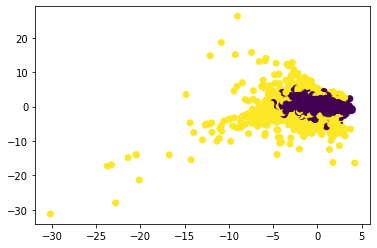

In [9]:
plt.scatter(val['V3'], val['V7'], c=np.where(result==1, 0, 1))
plt.show()

In [10]:
isf2 = IsolationForest(contamination=0.0011, random_state=0).fit(train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [11]:
result2 = isf2.predict(val)

In [12]:
f1_score(val_class, np.where(result2==1, 0, 1), average='macro')

0.7140043609762959

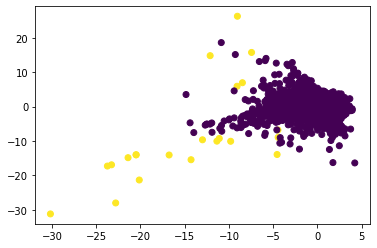

In [34]:
plt.scatter(val['V3'], val['V7'], c=np.where(result2==1, 0, 1))
plt.show()

In [14]:
# scaler별 비교
# 1. standard scaling
# 2. minmax scaling
# 3. maxabs scaling
# 4. robust scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [21]:
scaler1 = StandardScaler().fit(train)
scaler2 = MinMaxScaler().fit(train)
scaler3 = MaxAbsScaler().fit(train)
scaler4 = RobustScaler().fit(train)

In [38]:
isf3 = IsolationForest(contamination=0.0011, random_state=0).fit(scaler1.transform(train))

In [39]:
result3 = isf3.predict(scaler1.transform(val))

In [40]:
f1_score(val_class, np.where(result3==1, 0, 1), average='macro')

0.7140043609762959

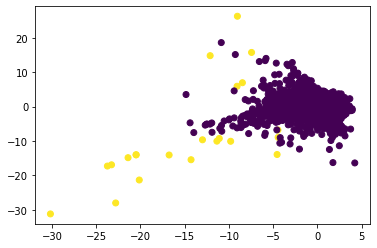

In [42]:
plt.scatter(val['V3'], val['V7'], c=np.where(result3==1, 0, 1))
plt.show()

In [43]:
pd.DataFrame(scaler1.transform(train)).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,...,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05,1.138420e+05
mean,9.986370e-18,-6.990459e-18,3.994548e-17,-3.994548e-17,1.597819e-17,5.991822e-18,1.597819e-17,3.994548e-18,3.432815e-18,1.672717e-17,...,-7.489778e-18,-2.995911e-18,-1.597819e-17,-8.488415e-18,2.396729e-17,2.546524e-17,8.738074e-18,5.991822e-18,2.995911e-17,1.597819e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.891143e+01,-4.404272e+01,-2.168730e+01,-3.961724e+00,-3.082086e+01,-1.966489e+01,-3.447585e+01,-4.297002e+01,-1.226203e+01,-2.278321e+01,...,-3.151850e+01,-1.227784e+01,-7.044391e+01,-4.661148e+00,-1.979951e+01,-3.856866e+00,-2.476825e+01,-2.700547e+01,-3.617625e-01,-1.990839e+00
25%,-4.734248e-01,-3.615209e-01,-5.969594e-01,-6.014037e-01,-5.048002e-01,-5.796248e-01,-4.632818e-01,-1.746449e-01,-5.891582e-01,-5.028191e-01,...,-3.164376e-01,-7.464045e-01,-2.529060e-01,-5.854532e-01,-6.098260e-01,-6.775104e-01,-1.767528e-01,-1.480942e-01,-3.392442e-01,-8.537647e-01
50%,6.087142e-03,3.943019e-02,1.163400e-01,-1.075321e-02,-3.987825e-02,-2.086138e-01,2.762811e-02,1.975560e-02,-4.569051e-02,-8.962586e-02,...,-4.022034e-02,1.152957e-02,-1.720530e-02,6.842869e-02,3.191485e-02,-1.091987e-01,4.344384e-03,3.275862e-02,-2.718939e-01,-2.128823e-01
75%,6.740856e-01,4.847794e-01,6.863496e-01,5.283610e-01,4.487943e-01,3.007295e-01,4.675513e-01,2.789995e-01,5.411779e-01,4.201101e-01,...,2.593411e-01,7.304939e-01,2.339279e-01,7.247792e-01,6.774301e-01,5.013363e-01,2.290662e-01,2.200319e-01,-4.650593e-02,9.395568e-01
max,1.258159e+00,1.300132e+01,2.791147e+00,1.167710e+01,2.544826e+01,1.797167e+01,3.658209e+01,1.687868e+01,9.489591e+00,1.430605e+01,...,3.767888e+01,1.155248e+01,3.542087e+01,6.641477e+00,1.445565e+01,6.485947e+00,2.787452e+01,9.504534e+01,5.249871e+01,1.645983e+00


In [44]:
train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [45]:
isf4 = IsolationForest(contamination=0.0011, random_state=0).fit(scaler2.transform(train))

In [55]:
pd.DataFrame(scaler2.transform(train)).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,0.958297,0.772083,0.885975,0.253326,0.547740,0.522494,0.485179,0.717978,0.563730,0.614281,...,0.455487,0.515219,0.665414,0.412395,0.578001,0.372903,0.470497,0.221264,0.006844,0.547412
std,0.033146,0.017530,0.040852,0.063944,0.017772,0.026570,0.014073,0.016709,0.045974,0.026962,...,0.014451,0.041964,0.009446,0.088475,0.029193,0.096686,0.018996,0.008193,0.018918,0.274967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942605,0.765745,0.861588,0.214870,0.538769,0.507094,0.478660,0.715059,0.536644,0.600724,...,0.450914,0.483898,0.663025,0.360597,0.560198,0.307398,0.467139,0.220051,0.000426,0.312656
50%,0.958499,0.772774,0.890728,0.252639,0.547032,0.516951,0.485568,0.718308,0.561629,0.611864,...,0.454906,0.515703,0.665252,0.418449,0.578933,0.362345,0.470579,0.221533,0.001700,0.488876
75%,0.980640,0.780581,0.914014,0.287111,0.555716,0.530485,0.491759,0.722639,0.588609,0.625608,...,0.459235,0.545873,0.667624,0.476520,0.597777,0.421375,0.474848,0.223067,0.005964,0.805757
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
result4 = isf4.predict(scaler2.transform(val))

In [54]:
f1_score(val_class, np.where(result4==1, 0, 1), average='macro')

0.7140043609762959

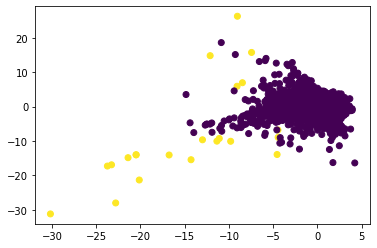

In [56]:
plt.scatter(val['V3'], val['V7'], c=np.where(result4==1, 0, 1))
plt.show()

In [57]:
isf5 = IsolationForest(contamination=0.0011, random_state=0).fit(scaler3.transform(train))

In [58]:
pd.DataFrame(scaler3.transform(train)).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,0.000003,0.000018,0.000299,-0.000253,0.000011,0.000197,0.000131,-0.000048,-0.000157,0.000213,...,-0.000046,4.600359e-08,-0.000029,-0.000220,0.000163,-0.000094,-0.000021,-0.000015,0.005149,0.112306
std,0.034589,0.022706,0.046124,0.085660,0.032446,0.050862,0.027332,0.023271,0.081540,0.043902,...,0.026541,8.144792e-02,0.014195,0.150603,0.050515,0.154195,0.035876,0.010521,0.018950,0.539311
min,-1.000000,-1.000000,-1.000000,-0.339612,-1.000000,-1.000000,-0.942170,-1.000000,-1.000000,-1.000000,...,-0.836587,-1.000000e+00,-1.000000,-0.702198,-1.000000,-0.594800,-0.888602,-0.284152,-0.001707,-0.961371
25%,-0.016372,-0.008191,-0.027235,-0.051769,-0.016367,-0.029284,-0.012532,-0.004112,-0.048197,-0.021861,...,-0.008444,-6.079278e-02,-0.003619,-0.088390,-0.030642,-0.104562,-0.006362,-0.001573,-0.001280,-0.348137
50%,0.000214,0.000913,0.005665,-0.001174,-0.001283,-0.010414,0.000886,0.000412,-0.003882,-0.003721,...,-0.001113,9.391010e-04,-0.000274,0.010086,0.001775,-0.016932,0.000135,0.000330,-0.000004,-0.002503
75%,0.023319,0.011025,0.031956,0.045006,0.014573,0.015492,0.012910,0.006444,0.043971,0.018657,...,0.006838,5.949700e-02,0.003291,0.108933,0.034383,0.077209,0.008197,0.002300,0.004267,0.619018
max,0.043521,0.295221,0.129038,1.000000,0.825703,0.914273,1.000000,0.392734,0.773622,0.628268,...,1.000000,9.409215e-01,0.502780,1.000000,0.730384,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
result5 = isf5.predict(scaler3.transform(val))

In [60]:
f1_score(val_class, np.where(result5==1, 0, 1), average='macro')

0.7140043609762959

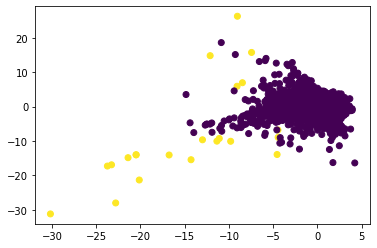

In [62]:
plt.scatter(val['V3'], val['V7'], c=np.where(result5==1, 0, 1))
plt.show()

In [63]:
isf6 = IsolationForest(contamination=0.0011, random_state=0).fit(scaler4.transform(train))

In [64]:
pd.DataFrame(scaler4.transform(train)).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,113842.000000,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,1.138420e+05,1.138420e+05,113842.000000,113842.000000,...,1.138420e+05,113842.000000,1.138420e+05,113842.000000,113842.000000,1.138420e+05,113842.000000,1.138420e+05,113842.000000,1.138420e+05
mean,-0.005305,-4.659126e-02,-0.090656,9.518101e-03,4.181888e-02,0.236966,-2.968106e-02,-4.354864e-02,0.040422,0.097110,...,6.985382e-02,-0.007807,3.534120e-02,-0.052226,-0.024793,9.263181e-02,-0.010705,-8.898751e-02,0.928795,1.187084e-01
std,0.871456,1.181619e+00,0.779239,8.851440e-01,1.048668e+00,1.135911,1.074311e+00,2.204379e+00,0.884697,1.083511,...,1.736786e+00,0.677098,2.054098e+00,0.763227,0.776850,8.482905e-01,2.464164,2.716472e+00,3.416036,5.576269e-01
min,-25.200226,-5.208808e+01,-16.990171,-3.497162e+00,-3.227890e+01,-22.100505,-3.706731e+01,-9.476536e+01,-10.807710,-24.588650,...,-5.467080e+01,-8.321065,-1.446627e+02,-3.609724,-15.405971,-3.179097e+00,-61.043467,-7.344829e+01,-0.306993,-9.914320e-01
25%,-0.417872,-4.737693e-01,-0.555828,-5.228084e-01,-4.875468e-01,-0.421434,-5.273877e-01,-4.285306e-01,-0.480802,-0.447698,...,-4.797282e-01,-0.513193,-4.841502e-01,-0.499058,-0.498534,-4.820913e-01,-0.446251,-4.912795e-01,-0.230070,-3.573717e-01
50%,0.000000,4.967001e-18,0.000000,1.087590e-18,2.660478e-18,0.000000,3.095482e-18,-3.225501e-18,0.000000,0.000000,...,-4.174178e-18,0.000000,2.801985e-18,0.000000,0.000000,6.118966e-18,0.000000,6.615751e-18,0.000000,2.159934e-19
75%,0.582128,5.262307e-01,0.444172,4.771916e-01,5.124532e-01,0.578566,4.726123e-01,5.714694e-01,0.519198,0.552302,...,5.202718e-01,0.486807,5.158498e-01,0.500942,0.501466,5.179087e-01,0.553749,5.087205e-01,0.769930,6.426283e-01
max,1.091120,1.531595e+01,2.084305,1.034539e+01,2.672848e+01,20.651105,3.927069e+01,3.716330e+01,8.435793,15.597806,...,6.550973e+01,7.814316,7.279295e+01,5.016704,11.205024,5.594575e+00,68.676360,2.580979e+02,180.265455,1.036549e+00


In [65]:
result6 = isf6.predict(scaler4.transform(val))

In [66]:
f1_score(val_class, np.where(result6==1, 0, 1), average='macro')

0.7140043609762959

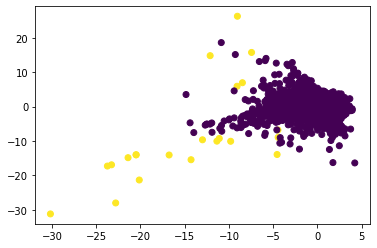

In [67]:
plt.scatter(val['V3'], val['V7'], c=np.where(result6==1, 0, 1))
plt.show()

In [80]:
isf7 = IsolationForest(n_estimators=200, max_samples='auto', contamination=0.0011, max_features=1.0, random_state=0).fit(train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [81]:
result7 = isf7.predict(val)

In [82]:
f1_score(val_class, np.where(result7==1, 0, 1), average='macro')

0.6997098595016618

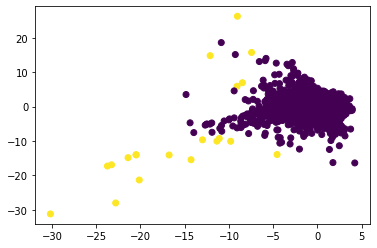

In [83]:
plt.scatter(val['V3'], val['V7'], c=np.where(result7==1, 0, 1))
plt.show()

In [97]:
isf8 = IsolationForest(n_estimators=600, max_samples='auto', contamination=0.0011, max_features=1.0, random_state=0).fit(train)

In [98]:
result8 = isf8.predict(val)

In [99]:
f1_score(val_class, np.where(result8==1, 0, 1), average='macro')

0.5135837978486838

In [6]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [107]:
pca = PCA(n_components=10)
pcar = pca.fit(train)

In [109]:
isf9 = IsolationForest(contamination=0.0011, max_features=1.0, random_state=0).fit(pca.transform(train))

In [111]:
result9 = isf9.predict(pca.transform(val))

In [112]:
f1_score(val_class, np.where(result9==1, 0, 1), average='macro')

0.6663149502907522

In [7]:
isf10 = IsolationForest(contamination=0.0011, max_features=1.0, random_state=0).fit(train.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
result10 = isf10.predict(val.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3']])

In [9]:
f1_score(val_class, np.where(result10==1, 0, 1), average='macro')

0.7583744968510364

In [10]:
isf11 = IsolationForest(contamination=0.0011, max_features=1.0, random_state=0).fit(train.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [12]:
result11 = isf11.predict(val.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16']])

In [13]:
f1_score(val_class, np.where(result11==1, 0, 1), average='macro')

0.7804819432476949

In [14]:
isf12 = IsolationForest(contamination=0.0011, max_features=1.0, random_state=0).fit(train.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16', 'V5']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [15]:
result12 = isf12.predict(val.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16', 'V5']])

In [16]:
f1_score(val_class, np.where(result12==1, 0, 1), average='macro')

0.7497538158542589

In [42]:
isf13 = IsolationForest(n_estimators=200, max_samples = 0.2, contamination=0.0011, max_features=1.0, random_state=0).fit(train.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [43]:
result13 = isf13.predict(val.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16']])

In [44]:
f1_score(val_class, np.where(result13==1, 0, 1), average='macro')

0.7879157743510873

In [45]:
test_predict = isf13.predict(test.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V16']])


In [46]:
submission.Class = np.where(test_predict==1, 0, 1)

In [47]:
submission.to_csv('submission_isf.csv', index=False)

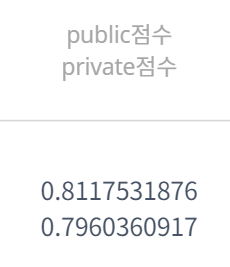